In [1]:
import os, sys
import glob
import logging
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as pyfits
import astropy.wcs as pywcs

os.environ['CRDS_PATH'] = os.path.expanduser('/lustre/JDAP/home/jdap02/crds')
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'
import jwst

# grizli stuff
import grizli
from grizli import utils, prep, jwst_utils, multifit, fitting, model
from grizli.pipeline import auto_script

utils.set_warnings()

print('Grizli version: ', grizli.__version__)
print('jwst pipeline version: ', jwst.__version__)

Grizli version:  1.9
jwst pipeline version:  1.14.0


sh: aws: command not found


In [2]:
# set home path
HOME_PATH = '/lustre/JDAP/home/jdap02/start_from_s1/'
field_root = 'glass-2022data'    # the root directory for this data reduction

# first set up pipeline parameters
os.chdir(os.path.join(HOME_PATH, field_root))
kwargs = auto_script.get_yml_parameters()

sh: aws: command not found


# Drizzle full mosaics

Combine all exposures in a given instrument/filter into mosaics with a common pixel grid.  

Below I use the following pixel scale of **0.03"** to Nyquist sample the native PSF of 0.065"


In [3]:
os.chdir(os.path.join(HOME_PATH, field_root, 'Prep'))

mosaic_args = kwargs['mosaic_args']

mosaic_args['fill_mosaics'] = False

# Set the mosaic pixel scale here
mosaic_args['wcs_params']['pixel_scale'] = 0.03

mosaic_args['half_optical_pixscale'] = True

# mosaic_args['ir_filters'] = ['F115W','F150W','F200W','F277W','F356W','F444W']
mosaic_args['ir_filters'] = ['F115W','F150W','F200W']

mosaic_args['wcs_params']['pad_reference'] = 6 # small padding around edge, arcsec
kwargs['mosaic_drizzle_args']['static'] = False

auto_script.make_combined_mosaics(field_root, mosaic_args=mosaic_args,  mosaic_drizzle_args=kwargs['mosaic_drizzle_args'])


  0/ 48: jw01324001001_02101_00001_nis_rate.fits[SCI,1]    5.14
  1/ 48: jw01324001001_03101_00001_nis_rate.fits[SCI,1]    5.14
  2/ 48: jw01324001001_03101_00002_nis_rate.fits[SCI,1]    5.17
  3/ 48: jw01324001001_03101_00003_nis_rate.fits[SCI,1]    5.18
  4/ 48: jw01324001001_03101_00004_nis_rate.fits[SCI,1]    5.19
  5/ 48: jw01324001001_04101_00001_nis_rate.fits[SCI,1]    5.19
  6/ 48: jw01324001001_04101_00002_nis_rate.fits[SCI,1]    5.19
  7/ 48: jw01324001001_04101_00003_nis_rate.fits[SCI,1]    5.19
  8/ 48: jw01324001001_04101_00004_nis_rate.fits[SCI,1]    5.19
  9/ 48: jw01324001001_05101_00001_nis_rate.fits[SCI,1]    5.19
 10/ 48: jw01324001001_05101_00002_nis_rate.fits[SCI,1]    5.21
 11/ 48: jw01324001001_05101_00003_nis_rate.fits[SCI,1]    5.22
 12/ 48: jw01324001001_05101_00004_nis_rate.fits[SCI,1]    5.22
 13/ 48: jw01324001001_06101_00001_nis_rate.fits[SCI,1]    5.22
 14/ 48: jw01324001001_06101_00002_nis_rate.fits[SCI,1]    5.22
 15/ 48: jw01324001001_06101_00003_nis_r

2024-06-27 10:20:37,639 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-06-27 10:20:37,641 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-06-27 10:20:37,642 - stpipe - INFO - AstroDrizzle Version 3.7.0.1 started at: 10:20:37.642 (27/06/2024)


AstroDrizzle Version 3.7.0.1 started at: 10:20:37.642 (27/06/2024)


2024-06-27 10:20:37,643 - stpipe - INFO - 


2024-06-27 10:20:37,644 - stpipe - INFO - Version Information
2024-06-27 10:20:37,644 - stpipe - INFO - --------------------
2024-06-27 10:20:37,645 - stpipe - INFO - Python Version 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
2024-06-27 10:20:37,645 - stpipe - INFO - numpy Version -> 1.26.4 
2024-06-27 10:20:37,646 - stpipe - INFO - astropy Version -> 6.1.1 
2024-06-27 10:20:37,646 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-06-27 10:20:37,647 - stpipe - INFO - photutils Version -> 1.12.0 
2024-06-27 10:20:37,648 - stpipe - INFO - ==== Processing Step  Initialization  started at  10:20:37.648 (27/06/2024)


==== Processing Step  Initialization  started at  10:20:37.648 (27/06/2024)


2024-06-27 10:20:37,649 - stpipe - INFO - 


2024-06-27 10:20:37,788 - stpipe - INFO - Executing serially
2024-06-27 10:20:38,016 - stpipe - INFO - Setting up output name: glass-2022data-f115w_drz.fits
2024-06-27 10:20:38,020 - stpipe - INFO - ##############################################################################


##############################################################################


2024-06-27 10:20:38,021 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-06-27 10:20:38,022 - stpipe - INFO - # “minmed” is highly recommended for three images,                           #


# “minmed” is highly recommended for three images,                           #


2024-06-27 10:20:38,023 - stpipe - INFO - #  and is good for four to six images,                                       #


#  and is good for four to six images,                                       #


2024-06-27 10:20:38,024 - stpipe - INFO - #  but should be avoided for ten or more images.                             #


#  but should be avoided for ten or more images.                             #


2024-06-27 10:20:38,025 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-06-27 10:20:38,026 - stpipe - INFO - ##############################################################################


##############################################################################


2024-06-27 10:20:38,035 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-06-27 10:20:38,396 - stpipe - INFO - Reading in MDRIZSKY of 0.22424273192882538
2024-06-27 10:20:38,526 - stpipe - INFO - Reading in MDRIZSKY of 0.226111501455307
2024-06-27 10:20:38,657 - stpipe - INFO - Reading in MDRIZSKY of 0.2270340621471405
2024-06-27 10:20:38,787 - stpipe - INFO - Reading in MDRIZSKY of 0.2231787145137787
2024-06-27 10:20:38,915 - stpipe - INFO - Reading in MDRIZSKY of 0.2268390953540802
2024-06-27 10:20:39,044 - stpipe - INFO - Reading in MDRIZSKY of 0.22608450055122375
2024-06-27 10:20:39,177 - stpipe - INFO - Reading in MDRIZSKY of 0.2261202186346054
2024-06-27 10:20:39,307 - stpipe - INFO - Reading in MDRIZSKY of 0.22605599462985992
2024-06-27 10:20:39,333 - stpipe - INFO - No context image will be created for jw01324001001_02101_00001_nis_rate.fits
2024-06-27 10:20:39,334 - stpipe - INFO - No context image will be created for jw01324001001_04101_00001_ni

Creating OUTPUT WCS from glass-2022data_wcs-ref.fits[1]


2024-06-27 10:20:39,354 - stpipe - INFO - WCS Keywords


WCS Keywords


2024-06-27 10:20:39,355 - stpipe - INFO - 


2024-06-27 10:20:39,356 - stpipe - INFO - CD_11  CD_12: -8.3333333333333e-06 0.0


CD_11  CD_12: -8.3333333333333e-06 0.0


2024-06-27 10:20:39,357 - stpipe - INFO - CD_21  CD_22: 0.0 8.33333333333333e-06


CD_21  CD_22: 0.0 8.33333333333333e-06


2024-06-27 10:20:39,358 - stpipe - INFO - CRVAL    : 3.595475565788118 -30.39433251948023


CRVAL    : 3.595475565788118 -30.39433251948023


2024-06-27 10:20:39,359 - stpipe - INFO - CRPIX    : 3287.0 3214.5


CRPIX    : 3287.0 3214.5


2024-06-27 10:20:39,360 - stpipe - INFO - NAXIS    : 6573 6428


NAXIS    : 6573 6428


2024-06-27 10:20:39,361 - stpipe - INFO - Plate Scale : 0.02999999999999988


Plate Scale : 0.02999999999999988


2024-06-27 10:20:39,362 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2024-06-27 10:20:39,363 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-06-27 10:20:39,364 - stpipe - INFO - *


*


2024-06-27 10:20:39,365 - stpipe - INFO - *  Estimated memory usage:  up to 515 Mb.


*  Estimated memory usage:  up to 515 Mb.


2024-06-27 10:20:39,366 - stpipe - INFO - *  Output image size:       6573 X 6428 pixels. 


*  Output image size:       6573 X 6428 pixels. 


2024-06-27 10:20:39,367 - stpipe - INFO - *  Output image file:       ~ 483 Mb. 


*  Output image file:       ~ 483 Mb. 


2024-06-27 10:20:39,368 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2024-06-27 10:20:39,369 - stpipe - INFO - *


*


2024-06-27 10:20:39,370 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-06-27 10:20:39,371 - stpipe - INFO - ==== Processing Step Initialization finished at 10:20:39.371 (27/06/2024)


==== Processing Step Initialization finished at 10:20:39.371 (27/06/2024)


2024-06-27 10:20:39,372 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-06-27 10:20:39,373 - stpipe - INFO - 	build :	False
2024-06-27 10:20:39,373 - stpipe - INFO - 	coeffs :	True
2024-06-27 10:20:39,374 - stpipe - INFO - 	context :	False
2024-06-27 10:20:39,374 - stpipe - INFO - 	crbit :	4096
2024-06-27 10:20:39,375 - stpipe - INFO - 	group :	
2024-06-27 10:20:39,375 - stpipe - INFO - 	in_memory :	False
2024-06-27 10:20:39,376 - stpipe - INFO - 	input :	['jw01324001001_02101_00001_nis_rate.fits', 'jw01324001001_04101_00001_nis_rate.fits', 'jw01324001001_04101_00002_nis_rate.fits', 'jw01324001001_04101_00003_nis_rate.fits', 'jw01324001001_04101_00004_nis_rate.fits', 'jw01324001001_06101_00001_nis_rate.fits', 'jw01324001001_06101_00002_nis_rate.fits', 'jw01324001001_06101_00003_nis_rate.fits']
2024-06-27 10:20:39,376 - stpipe - INFO - 	mdriztab :	False
2024-06-27 10:20:39,377 - stpipe - INFO - 	num_cores :	None
2024-06-27 10:20:39,377 - stpipe - INFO - 	out

==== Processing Step  Static Mask  started at  10:20:39.38 (27/06/2024)


2024-06-27 10:20:39,382 - stpipe - INFO - 


2024-06-27 10:20:39,383 - stpipe - INFO - Static Mask step not performed.
2024-06-27 10:20:39,384 - stpipe - INFO - ==== Processing Step Static Mask finished at 10:20:39.383 (27/06/2024)


==== Processing Step Static Mask finished at 10:20:39.383 (27/06/2024)


2024-06-27 10:20:39,385 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  10:20:39.385 (27/06/2024)


==== Processing Step  Subtract Sky  started at  10:20:39.385 (27/06/2024)


2024-06-27 10:20:39,386 - stpipe - INFO - 


2024-06-27 10:20:39,387 - stpipe - INFO - Sky Subtraction step not performed.
2024-06-27 10:20:39,777 - stpipe - INFO - Retrieving user computed sky values from image headers 
2024-06-27 10:20:39,778 - stpipe - INFO - recorded in the 'MDRIZSKY' header keywords.
2024-06-27 10:20:39,778 - stpipe - INFO - Working on sky for: jw01324001001_02101_00001_nis_rate.fits
2024-06-27 10:20:39,779 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,780 - stpipe - INFO - Working on sky for: jw01324001001_04101_00001_nis_rate.fits
2024-06-27 10:20:39,781 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,782 - stpipe - INFO - Working on sky for: jw01324001001_04101_00002_nis_rate.fits
2024-06-27 10:20:39,782 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,783 - stpipe - INFO - Working on sky for: jw01324001001_04101_00003_nis_rate.fits
2024-06-27 10:20:39,784 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,785 - stpipe - INFO - Working on sky for: jw01324001001_04101_00004_nis_rate.fits
2024-06-27 10:20:39,786 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,786 - stpipe - INFO - Working on sky for: jw01324001001_06101_00001_nis_rate.fits
2024-06-27 10:20:39,787 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,788 - stpipe - INFO - Working on sky for: jw01324001001_06101_00002_nis_rate.fits
2024-06-27 10:20:39,789 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,790 - stpipe - INFO - Working on sky for: jw01324001001_06101_00003_nis_rate.fits
2024-06-27 10:20:39,790 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:20:39,791 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 10:20:39.791 (27/06/2024)


==== Processing Step Subtract Sky finished at 10:20:39.791 (27/06/2024)


2024-06-27 10:20:39,793 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  10:20:39.793 (27/06/2024)


==== Processing Step  Separate Drizzle  started at  10:20:39.793 (27/06/2024)


2024-06-27 10:20:39,794 - stpipe - INFO - 


2024-06-27 10:20:39,795 - stpipe - INFO - Single drizzle step not performed.
2024-06-27 10:20:39,795 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 10:20:39.795 (27/06/2024)


==== Processing Step Separate Drizzle finished at 10:20:39.795 (27/06/2024)


2024-06-27 10:20:39,797 - stpipe - INFO - ==== Processing Step  Create Median  started at  10:20:39.796 (27/06/2024)


==== Processing Step  Create Median  started at  10:20:39.796 (27/06/2024)


2024-06-27 10:20:39,798 - stpipe - INFO - 


2024-06-27 10:20:39,799 - stpipe - INFO - Median combination step not performed.
2024-06-27 10:20:39,799 - stpipe - INFO - ==== Processing Step  Blot  started at  10:20:39.799 (27/06/2024)


==== Processing Step  Blot  started at  10:20:39.799 (27/06/2024)


2024-06-27 10:20:39,800 - stpipe - INFO - 


2024-06-27 10:20:39,802 - stpipe - INFO - Blot step not performed.
2024-06-27 10:20:39,802 - stpipe - INFO - ==== Processing Step Blot finished at 10:20:39.802 (27/06/2024)


==== Processing Step Blot finished at 10:20:39.802 (27/06/2024)


2024-06-27 10:20:39,804 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  10:20:39.803 (27/06/2024)


==== Processing Step  Driz_CR  started at  10:20:39.803 (27/06/2024)


2024-06-27 10:20:39,805 - stpipe - INFO - 


2024-06-27 10:20:39,806 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2024-06-27 10:20:39,806 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  10:20:39.80 (27/06/2024)


==== Processing Step  Final Drizzle  started at  10:20:39.80 (27/06/2024)


2024-06-27 10:20:39,807 - stpipe - INFO - 


2024-06-27 10:20:39,808 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-06-27 10:20:39,809 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.75, 'fillval': None, 'maskval': None, 'bits': 5, 'units': 'cps'}
2024-06-27 10:20:39,809 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-06-27 10:20:39,810 - stpipe - INFO - 	bits :	5
2024-06-27 10:20:39,810 - stpipe - INFO - 	build :	False
2024-06-27 10:20:39,811 - stpipe - INFO - 	clean :	True
2024-06-27 10:20:39,811 - stpipe - INFO - 	coeffs :	True
2024-06-27 10:20:39,812 - stpipe - INFO - 	crbit :	4096
2024-06-27 10:20:39,812 - stpipe - INFO - 	fillval :	None
2024-06-27 10:20:39,813 - stpipe - INFO - 	kernel :	square
2024-06-27 10:20:39,813 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-06-27 10:20:39,814 - stpipe - INFO - 	maskval :	None
2024-06-27 10:20:39,814 - stpipe - INFO - 	pixfrac :	0.75
20

WCS Keywords


2024-06-27 10:20:39,821 - stpipe - INFO - 


2024-06-27 10:20:39,822 - stpipe - INFO - CD_11  CD_12: -8.3333333333333e-06 0.0


CD_11  CD_12: -8.3333333333333e-06 0.0


2024-06-27 10:20:39,823 - stpipe - INFO - CD_21  CD_22: 0.0 8.33333333333333e-06


CD_21  CD_22: 0.0 8.33333333333333e-06


2024-06-27 10:20:39,824 - stpipe - INFO - CRVAL    : 3.595475565788118 -30.39433251948023


CRVAL    : 3.595475565788118 -30.39433251948023


2024-06-27 10:20:39,825 - stpipe - INFO - CRPIX    : 3287.0 3214.5


CRPIX    : 3287.0 3214.5


2024-06-27 10:20:39,825 - stpipe - INFO - NAXIS    : 6573 6428


NAXIS    : 6573 6428


2024-06-27 10:20:39,827 - stpipe - INFO - Plate Scale : 0.02999999999999988


Plate Scale : 0.02999999999999988


2024-06-27 10:20:39,827 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2024-06-27 10:20:39,852 - stpipe - INFO - -Drizzle input: jw01324001001_02101_00001_nis_rate.fits[sci,1]
2024-06-27 10:20:39,879 - stpipe - INFO - Applying sky value of 0.224243 to jw01324001001_02101_00001_nis_rate.fits[sci,1]
2024-06-27 10:20:39,899 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2024-06-27 10:20:39,900 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-06-27 10:20:39,904 - stpipe - WARNING - Cannot find flat field file 'jwst_niriss_flat_0261.fits'
2024-06-27 10:20:39,904 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-06-27 10:20:39,954 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-06-27 10:20:39,955 - stpipe - INFO - stepsize = 10
2024-06-27 10:20:39,968 - stpipe - INFO - -Drizzling using kernel = square
2024-06-27 10:20:39,969 - stpipe - INFO - 
2024-06-27 10:20:41,543 - stpipe - INFO - -Drizzle input: jw01324001001_04101_00001_nis_rate.fits[sci,1]
2024-06-27 10:20:41,569 - s

-Generating simple FITS output: glass-2022data-f115w_drz_sci.fits


2024-06-27 10:20:54,058 - stpipe - INFO - Writing out image to disk: glass-2022data-f115w_drz_sci.fits


Writing out image to disk: glass-2022data-f115w_drz_sci.fits


2024-06-27 10:20:54,338 - stpipe - INFO - Writing out image to disk: glass-2022data-f115w_drz_wht.fits


Writing out image to disk: glass-2022data-f115w_drz_wht.fits


2024-06-27 10:20:54,572 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 10:20:54.572 (27/06/2024)


==== Processing Step Final Drizzle finished at 10:20:54.572 (27/06/2024)


2024-06-27 10:20:54,574 - stpipe - INFO - 


2024-06-27 10:20:54,575 - stpipe - INFO - AstroDrizzle Version 3.7.0.1 is finished processing at 10:20:54.575 (27/06/2024).


AstroDrizzle Version 3.7.0.1 is finished processing at 10:20:54.575 (27/06/2024).


2024-06-27 10:20:54,576 - stpipe - INFO - 


2024-06-27 10:20:54,577 - stpipe - INFO - 


2024-06-27 10:20:54,578 - stpipe - INFO - 


2024-06-27 10:20:54,579 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-06-27 10:20:54,580 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-06-27 10:20:54,581 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-06-27 10:20:54,582 - stpipe - INFO - 


2024-06-27 10:20:54,583 - stpipe - INFO -          Initialization          1.7231 sec.


         Initialization          1.7231 sec.


2024-06-27 10:20:54,584 - stpipe - INFO -             Static Mask          0.0025 sec.


            Static Mask          0.0025 sec.


2024-06-27 10:20:54,586 - stpipe - INFO -            Subtract Sky          0.4064 sec.


           Subtract Sky          0.4064 sec.


2024-06-27 10:20:54,587 - stpipe - INFO -        Separate Drizzle          0.0027 sec.


       Separate Drizzle          0.0027 sec.


2024-06-27 10:20:54,588 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2024-06-27 10:20:54,589 - stpipe - INFO -                    Blot          0.0031 sec.


                   Blot          0.0031 sec.


2024-06-27 10:20:54,590 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2024-06-27 10:20:54,591 - stpipe - INFO -           Final Drizzle          14.7659 sec.


          Final Drizzle          14.7659 sec.


2024-06-27 10:20:54,592 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-06-27 10:20:54,593 - stpipe - INFO -                   Total          16.9038 sec.


                  Total          16.9038 sec.


2024-06-27 10:20:54,594 - stpipe - INFO - 


2024-06-27 10:20:54,595 - stpipe - INFO - Removing intermediate files for jw01324001001_02101_00001_nis_rate.fits
2024-06-27 10:20:54,601 - stpipe - INFO - Removing intermediate files for jw01324001001_04101_00001_nis_rate.fits
2024-06-27 10:20:54,606 - stpipe - INFO - Removing intermediate files for jw01324001001_04101_00002_nis_rate.fits
2024-06-27 10:20:54,611 - stpipe - INFO - Removing intermediate files for jw01324001001_04101_00003_nis_rate.fits
2024-06-27 10:20:54,615 - stpipe - INFO - Removing intermediate files for jw01324001001_04101_00004_nis_rate.fits
2024-06-27 10:20:54,620 - stpipe - INFO - Removing intermediate files for jw01324001001_06101_00001_nis_rate.fits
2024-06-27 10:20:54,625 - stpipe - INFO - Removing intermediate files for jw01324001001_06101_00002_nis_rate.fits
2024-06-27 10:20:54,629 - stpipe - INFO - Removing intermediate files for jw01324001001_06101_00003_nis_rate.fits
2024-06-27 10:20:54,637 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# (2024-06-27 03:20:55.252)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_02101_00001_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F115W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2024-06-27 03:20:55.396)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_04101_00001_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F115W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2024-06-27 03:20:55.565)

jwst_utils.set_jwst_to_hst

2024-06-27 10:20:58,022 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-06-27 10:20:58,024 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-06-27 10:20:58,025 - stpipe - INFO - AstroDrizzle Version 3.7.0.1 started at: 10:20:58.02 (27/06/2024)


AstroDrizzle Version 3.7.0.1 started at: 10:20:58.02 (27/06/2024)


2024-06-27 10:20:58,027 - stpipe - INFO - 


2024-06-27 10:20:58,027 - stpipe - INFO - Version Information
2024-06-27 10:20:58,028 - stpipe - INFO - --------------------
2024-06-27 10:20:58,028 - stpipe - INFO - Python Version 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
2024-06-27 10:20:58,029 - stpipe - INFO - numpy Version -> 1.26.4 
2024-06-27 10:20:58,030 - stpipe - INFO - astropy Version -> 6.1.1 
2024-06-27 10:20:58,030 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-06-27 10:20:58,030 - stpipe - INFO - photutils Version -> 1.12.0 
2024-06-27 10:20:58,031 - stpipe - INFO - ==== Processing Step  Initialization  started at  10:20:58.031 (27/06/2024)


==== Processing Step  Initialization  started at  10:20:58.031 (27/06/2024)


2024-06-27 10:20:58,032 - stpipe - INFO - 


2024-06-27 10:20:58,183 - stpipe - INFO - Executing serially
2024-06-27 10:20:58,421 - stpipe - INFO - Setting up output name: glass-2022data-f150w_drz.fits
2024-06-27 10:20:58,425 - stpipe - INFO - ##############################################################################


##############################################################################


2024-06-27 10:20:58,426 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-06-27 10:20:58,427 - stpipe - INFO - # “minmed” is highly recommended for three images,                           #


# “minmed” is highly recommended for three images,                           #


2024-06-27 10:20:58,429 - stpipe - INFO - #  and is good for four to six images,                                       #


#  and is good for four to six images,                                       #


2024-06-27 10:20:58,430 - stpipe - INFO - #  but should be avoided for ten or more images.                             #


#  but should be avoided for ten or more images.                             #


2024-06-27 10:20:58,431 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-06-27 10:20:58,432 - stpipe - INFO - ##############################################################################


##############################################################################


2024-06-27 10:20:58,440 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-06-27 10:20:58,548 - stpipe - INFO - Reading in MDRIZSKY of 0.22933048009872437
2024-06-27 10:20:58,682 - stpipe - INFO - Reading in MDRIZSKY of 0.23138003051280975
2024-06-27 10:20:58,832 - stpipe - INFO - Reading in MDRIZSKY of 0.22703477740287784
2024-06-27 10:20:58,976 - stpipe - INFO - Reading in MDRIZSKY of 0.22711125016212463
2024-06-27 10:20:59,119 - stpipe - INFO - Reading in MDRIZSKY of 0.22707776725292206
2024-06-27 10:20:59,263 - stpipe - INFO - Reading in MDRIZSKY of 0.22891847789287567
2024-06-27 10:20:59,406 - stpipe - INFO - Reading in MDRIZSKY of 0.2259397804737091
2024-06-27 10:20:59,562 - stpipe - INFO - Reading in MDRIZSKY of 0.22853294014930725
2024-06-27 10:20:59,600 - stpipe - INFO - No context image will be created for jw01324001001_08101_00001_nis_rate.fits
2024-06-27 10:20:59,601 - stpipe - INFO - No context image will be created for jw01324001001_10101_000

Creating OUTPUT WCS from glass-2022data_wcs-ref.fits[1]


2024-06-27 10:20:59,624 - stpipe - INFO - WCS Keywords


WCS Keywords


2024-06-27 10:20:59,625 - stpipe - INFO - 


2024-06-27 10:20:59,626 - stpipe - INFO - CD_11  CD_12: -8.3333333333333e-06 0.0


CD_11  CD_12: -8.3333333333333e-06 0.0


2024-06-27 10:20:59,627 - stpipe - INFO - CD_21  CD_22: 0.0 8.33333333333333e-06


CD_21  CD_22: 0.0 8.33333333333333e-06


2024-06-27 10:20:59,628 - stpipe - INFO - CRVAL    : 3.595475565788118 -30.39433251948023


CRVAL    : 3.595475565788118 -30.39433251948023


2024-06-27 10:20:59,629 - stpipe - INFO - CRPIX    : 3287.0 3214.5


CRPIX    : 3287.0 3214.5


2024-06-27 10:20:59,630 - stpipe - INFO - NAXIS    : 6573 6428


NAXIS    : 6573 6428


2024-06-27 10:20:59,631 - stpipe - INFO - Plate Scale : 0.02999999999999988


Plate Scale : 0.02999999999999988


2024-06-27 10:20:59,632 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2024-06-27 10:20:59,634 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-06-27 10:20:59,635 - stpipe - INFO - *


*


2024-06-27 10:20:59,636 - stpipe - INFO - *  Estimated memory usage:  up to 515 Mb.


*  Estimated memory usage:  up to 515 Mb.


2024-06-27 10:20:59,637 - stpipe - INFO - *  Output image size:       6573 X 6428 pixels. 


*  Output image size:       6573 X 6428 pixels. 


2024-06-27 10:20:59,638 - stpipe - INFO - *  Output image file:       ~ 483 Mb. 


*  Output image file:       ~ 483 Mb. 


2024-06-27 10:20:59,639 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2024-06-27 10:20:59,640 - stpipe - INFO - *


*


2024-06-27 10:20:59,641 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-06-27 10:20:59,642 - stpipe - INFO - ==== Processing Step Initialization finished at 10:20:59.642 (27/06/2024)


==== Processing Step Initialization finished at 10:20:59.642 (27/06/2024)


2024-06-27 10:20:59,643 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-06-27 10:20:59,644 - stpipe - INFO - 	build :	False
2024-06-27 10:20:59,645 - stpipe - INFO - 	coeffs :	True
2024-06-27 10:20:59,645 - stpipe - INFO - 	context :	False
2024-06-27 10:20:59,646 - stpipe - INFO - 	crbit :	4096
2024-06-27 10:20:59,646 - stpipe - INFO - 	group :	
2024-06-27 10:20:59,647 - stpipe - INFO - 	in_memory :	False
2024-06-27 10:20:59,647 - stpipe - INFO - 	input :	['jw01324001001_08101_00001_nis_rate.fits', 'jw01324001001_10101_00001_nis_rate.fits', 'jw01324001001_10101_00002_nis_rate.fits', 'jw01324001001_10101_00003_nis_rate.fits', 'jw01324001001_10101_00004_nis_rate.fits', 'jw01324001001_12101_00001_nis_rate.fits', 'jw01324001001_12101_00002_nis_rate.fits', 'jw01324001001_12101_00003_nis_rate.fits']
2024-06-27 10:20:59,648 - stpipe - INFO - 	mdriztab :	False
2024-06-27 10:20:59,648 - stpipe - INFO - 	num_cores :	None
2024-06-27 10:20:59,649 - stpipe - INFO - 	out

==== Processing Step  Static Mask  started at  10:20:59.653 (27/06/2024)


2024-06-27 10:20:59,654 - stpipe - INFO - 


2024-06-27 10:20:59,656 - stpipe - INFO - Static Mask step not performed.
2024-06-27 10:20:59,656 - stpipe - INFO - ==== Processing Step Static Mask finished at 10:20:59.656 (27/06/2024)


==== Processing Step Static Mask finished at 10:20:59.656 (27/06/2024)


2024-06-27 10:20:59,658 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  10:20:59.657 (27/06/2024)


==== Processing Step  Subtract Sky  started at  10:20:59.657 (27/06/2024)


2024-06-27 10:20:59,659 - stpipe - INFO - 


2024-06-27 10:20:59,660 - stpipe - INFO - Sky Subtraction step not performed.
2024-06-27 10:21:00,232 - stpipe - INFO - Retrieving user computed sky values from image headers 
2024-06-27 10:21:00,233 - stpipe - INFO - recorded in the 'MDRIZSKY' header keywords.
2024-06-27 10:21:00,233 - stpipe - INFO - Working on sky for: jw01324001001_08101_00001_nis_rate.fits
2024-06-27 10:21:00,234 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,235 - stpipe - INFO - Working on sky for: jw01324001001_10101_00001_nis_rate.fits
2024-06-27 10:21:00,236 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,237 - stpipe - INFO - Working on sky for: jw01324001001_10101_00002_nis_rate.fits
2024-06-27 10:21:00,238 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,239 - stpipe - INFO - Working on sky for: jw01324001001_10101_00003_nis_rate.fits
2024-06-27 10:21:00,239 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,240 - stpipe - INFO - Working on sky for: jw01324001001_10101_00004_nis_rate.fits
2024-06-27 10:21:00,241 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,242 - stpipe - INFO - Working on sky for: jw01324001001_12101_00001_nis_rate.fits
2024-06-27 10:21:00,243 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,244 - stpipe - INFO - Working on sky for: jw01324001001_12101_00002_nis_rate.fits
2024-06-27 10:21:00,245 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,246 - stpipe - INFO - Working on sky for: jw01324001001_12101_00003_nis_rate.fits
2024-06-27 10:21:00,246 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:00,247 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 10:21:00.247 (27/06/2024)


==== Processing Step Subtract Sky finished at 10:21:00.247 (27/06/2024)


2024-06-27 10:21:00,249 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  10:21:00.249 (27/06/2024)


==== Processing Step  Separate Drizzle  started at  10:21:00.249 (27/06/2024)


2024-06-27 10:21:00,250 - stpipe - INFO - 


2024-06-27 10:21:00,251 - stpipe - INFO - Single drizzle step not performed.
2024-06-27 10:21:00,252 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 10:21:00.252 (27/06/2024)


==== Processing Step Separate Drizzle finished at 10:21:00.252 (27/06/2024)


2024-06-27 10:21:00,253 - stpipe - INFO - ==== Processing Step  Create Median  started at  10:21:00.253 (27/06/2024)


==== Processing Step  Create Median  started at  10:21:00.253 (27/06/2024)


2024-06-27 10:21:00,254 - stpipe - INFO - 


2024-06-27 10:21:00,255 - stpipe - INFO - Median combination step not performed.
2024-06-27 10:21:00,256 - stpipe - INFO - ==== Processing Step  Blot  started at  10:21:00.256 (27/06/2024)


==== Processing Step  Blot  started at  10:21:00.256 (27/06/2024)


2024-06-27 10:21:00,257 - stpipe - INFO - 


2024-06-27 10:21:00,258 - stpipe - INFO - Blot step not performed.
2024-06-27 10:21:00,259 - stpipe - INFO - ==== Processing Step Blot finished at 10:21:00.259 (27/06/2024)


==== Processing Step Blot finished at 10:21:00.259 (27/06/2024)


2024-06-27 10:21:00,260 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  10:21:00.260 (27/06/2024)


==== Processing Step  Driz_CR  started at  10:21:00.260 (27/06/2024)


2024-06-27 10:21:00,261 - stpipe - INFO - 


2024-06-27 10:21:00,263 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2024-06-27 10:21:00,263 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  10:21:00.263 (27/06/2024)


==== Processing Step  Final Drizzle  started at  10:21:00.263 (27/06/2024)


2024-06-27 10:21:00,264 - stpipe - INFO - 


2024-06-27 10:21:00,266 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-06-27 10:21:00,266 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.75, 'fillval': None, 'maskval': None, 'bits': 5, 'units': 'cps'}
2024-06-27 10:21:00,267 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-06-27 10:21:00,267 - stpipe - INFO - 	bits :	5
2024-06-27 10:21:00,268 - stpipe - INFO - 	build :	False
2024-06-27 10:21:00,268 - stpipe - INFO - 	clean :	True
2024-06-27 10:21:00,269 - stpipe - INFO - 	coeffs :	True
2024-06-27 10:21:00,270 - stpipe - INFO - 	crbit :	4096
2024-06-27 10:21:00,270 - stpipe - INFO - 	fillval :	None
2024-06-27 10:21:00,271 - stpipe - INFO - 	kernel :	square
2024-06-27 10:21:00,271 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-06-27 10:21:00,272 - stpipe - INFO - 	maskval :	None
2024-06-27 10:21:00,272 - stpipe - INFO - 	pixfrac :	0.75
20

WCS Keywords


2024-06-27 10:21:00,279 - stpipe - INFO - 


2024-06-27 10:21:00,281 - stpipe - INFO - CD_11  CD_12: -8.3333333333333e-06 0.0


CD_11  CD_12: -8.3333333333333e-06 0.0


2024-06-27 10:21:00,282 - stpipe - INFO - CD_21  CD_22: 0.0 8.33333333333333e-06


CD_21  CD_22: 0.0 8.33333333333333e-06


2024-06-27 10:21:00,283 - stpipe - INFO - CRVAL    : 3.595475565788118 -30.39433251948023


CRVAL    : 3.595475565788118 -30.39433251948023


2024-06-27 10:21:00,284 - stpipe - INFO - CRPIX    : 3287.0 3214.5


CRPIX    : 3287.0 3214.5


2024-06-27 10:21:00,285 - stpipe - INFO - NAXIS    : 6573 6428


NAXIS    : 6573 6428


2024-06-27 10:21:00,286 - stpipe - INFO - Plate Scale : 0.02999999999999988


Plate Scale : 0.02999999999999988


2024-06-27 10:21:00,287 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2024-06-27 10:21:00,314 - stpipe - INFO - -Drizzle input: jw01324001001_08101_00001_nis_rate.fits[sci,1]
2024-06-27 10:21:00,342 - stpipe - INFO - Applying sky value of 0.229330 to jw01324001001_08101_00001_nis_rate.fits[sci,1]
2024-06-27 10:21:00,371 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2024-06-27 10:21:00,373 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-06-27 10:21:00,377 - stpipe - WARNING - Cannot find flat field file 'jwst_niriss_flat_0282.fits'
2024-06-27 10:21:00,378 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-06-27 10:21:00,435 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-06-27 10:21:00,436 - stpipe - INFO - stepsize = 10
2024-06-27 10:21:00,451 - stpipe - INFO - -Drizzling using kernel = square
2024-06-27 10:21:00,451 - stpipe - INFO - 
2024-06-27 10:21:02,154 - stpipe - INFO - -Drizzle input: jw01324001001_10101_00001_nis_rate.fits[sci,1]
2024-06-27 10:21:02,184 - s

-Generating simple FITS output: glass-2022data-f150w_drz_sci.fits


2024-06-27 10:21:15,026 - stpipe - INFO - Writing out image to disk: glass-2022data-f150w_drz_sci.fits


Writing out image to disk: glass-2022data-f150w_drz_sci.fits


2024-06-27 10:21:15,317 - stpipe - INFO - Writing out image to disk: glass-2022data-f150w_drz_wht.fits


Writing out image to disk: glass-2022data-f150w_drz_wht.fits


2024-06-27 10:21:15,578 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 10:21:15.577 (27/06/2024)


==== Processing Step Final Drizzle finished at 10:21:15.577 (27/06/2024)


2024-06-27 10:21:15,579 - stpipe - INFO - 


2024-06-27 10:21:15,580 - stpipe - INFO - AstroDrizzle Version 3.7.0.1 is finished processing at 10:21:15.580 (27/06/2024).


AstroDrizzle Version 3.7.0.1 is finished processing at 10:21:15.580 (27/06/2024).


2024-06-27 10:21:15,581 - stpipe - INFO - 


2024-06-27 10:21:15,582 - stpipe - INFO - 


2024-06-27 10:21:15,583 - stpipe - INFO - 


2024-06-27 10:21:15,585 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-06-27 10:21:15,586 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-06-27 10:21:15,587 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-06-27 10:21:15,588 - stpipe - INFO - 


2024-06-27 10:21:15,589 - stpipe - INFO -          Initialization          1.6107 sec.


         Initialization          1.6107 sec.


2024-06-27 10:21:15,590 - stpipe - INFO -             Static Mask          0.0027 sec.


            Static Mask          0.0027 sec.


2024-06-27 10:21:15,591 - stpipe - INFO -            Subtract Sky          0.5897 sec.


           Subtract Sky          0.5897 sec.


2024-06-27 10:21:15,592 - stpipe - INFO -        Separate Drizzle          0.0029 sec.


       Separate Drizzle          0.0029 sec.


2024-06-27 10:21:15,593 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2024-06-27 10:21:15,594 - stpipe - INFO -                    Blot          0.0031 sec.


                   Blot          0.0031 sec.


2024-06-27 10:21:15,595 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2024-06-27 10:21:15,596 - stpipe - INFO -           Final Drizzle          15.3139 sec.


          Final Drizzle          15.3139 sec.


2024-06-27 10:21:15,596 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-06-27 10:21:15,597 - stpipe - INFO -                   Total          17.5230 sec.


                  Total          17.5230 sec.


2024-06-27 10:21:15,598 - stpipe - INFO - 


2024-06-27 10:21:15,600 - stpipe - INFO - Removing intermediate files for jw01324001001_08101_00001_nis_rate.fits
2024-06-27 10:21:15,605 - stpipe - INFO - Removing intermediate files for jw01324001001_10101_00001_nis_rate.fits
2024-06-27 10:21:15,611 - stpipe - INFO - Removing intermediate files for jw01324001001_10101_00002_nis_rate.fits
2024-06-27 10:21:15,616 - stpipe - INFO - Removing intermediate files for jw01324001001_10101_00003_nis_rate.fits
2024-06-27 10:21:15,621 - stpipe - INFO - Removing intermediate files for jw01324001001_10101_00004_nis_rate.fits
2024-06-27 10:21:15,626 - stpipe - INFO - Removing intermediate files for jw01324001001_12101_00001_nis_rate.fits
2024-06-27 10:21:15,631 - stpipe - INFO - Removing intermediate files for jw01324001001_12101_00002_nis_rate.fits
2024-06-27 10:21:15,636 - stpipe - INFO - Removing intermediate files for jw01324001001_12101_00003_nis_rate.fits
2024-06-27 10:21:15,646 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# (2024-06-27 03:21:16.199)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_08101_00001_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F150W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2024-06-27 03:21:16.393)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_10101_00001_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F150W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2024-06-27 03:21:16.570)

jwst_utils.set_jwst_to_hst

2024-06-27 10:21:19,128 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2024-06-27 10:21:19,130 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2024-06-27 10:21:19,131 - stpipe - INFO - AstroDrizzle Version 3.7.0.1 started at: 10:21:19.131 (27/06/2024)


AstroDrizzle Version 3.7.0.1 started at: 10:21:19.131 (27/06/2024)


2024-06-27 10:21:19,132 - stpipe - INFO - 


2024-06-27 10:21:19,133 - stpipe - INFO - Version Information
2024-06-27 10:21:19,133 - stpipe - INFO - --------------------
2024-06-27 10:21:19,133 - stpipe - INFO - Python Version 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
2024-06-27 10:21:19,134 - stpipe - INFO - numpy Version -> 1.26.4 
2024-06-27 10:21:19,134 - stpipe - INFO - astropy Version -> 6.1.1 
2024-06-27 10:21:19,134 - stpipe - INFO - stwcs Version -> 1.7.3 
2024-06-27 10:21:19,135 - stpipe - INFO - photutils Version -> 1.12.0 
2024-06-27 10:21:19,135 - stpipe - INFO - ==== Processing Step  Initialization  started at  10:21:19.135 (27/06/2024)


==== Processing Step  Initialization  started at  10:21:19.135 (27/06/2024)


2024-06-27 10:21:19,137 - stpipe - INFO - 


2024-06-27 10:21:19,285 - stpipe - INFO - Executing serially
2024-06-27 10:21:19,531 - stpipe - INFO - Setting up output name: glass-2022data-f200w_drz.fits
2024-06-27 10:21:19,536 - stpipe - INFO - ##############################################################################


##############################################################################


2024-06-27 10:21:19,537 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-06-27 10:21:19,538 - stpipe - INFO - # “minmed” is highly recommended for three images,                           #


# “minmed” is highly recommended for three images,                           #


2024-06-27 10:21:19,539 - stpipe - INFO - #  and is good for four to six images,                                       #


#  and is good for four to six images,                                       #


2024-06-27 10:21:19,540 - stpipe - INFO - #  but should be avoided for ten or more images.                             #


#  but should be avoided for ten or more images.                             #


2024-06-27 10:21:19,541 - stpipe - INFO - #                                                                            #


#                                                                            #


2024-06-27 10:21:19,542 - stpipe - INFO - ##############################################################################


##############################################################################


2024-06-27 10:21:19,550 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2024-06-27 10:21:19,828 - stpipe - INFO - Reading in MDRIZSKY of 0.18428528308868408
2024-06-27 10:21:19,963 - stpipe - INFO - Reading in MDRIZSKY of 0.18516577780246732
2024-06-27 10:21:20,099 - stpipe - INFO - Reading in MDRIZSKY of 0.18517042696475985
2024-06-27 10:21:20,236 - stpipe - INFO - Reading in MDRIZSKY of 0.1834816336631775
2024-06-27 10:21:20,372 - stpipe - INFO - Reading in MDRIZSKY of 0.18546099960803986
2024-06-27 10:21:20,503 - stpipe - INFO - Reading in MDRIZSKY of 0.18526512384414673
2024-06-27 10:21:20,639 - stpipe - INFO - Reading in MDRIZSKY of 0.1856273114681244
2024-06-27 10:21:20,775 - stpipe - INFO - Reading in MDRIZSKY of 0.1852954477071762
2024-06-27 10:21:20,802 - stpipe - INFO - No context image will be created for jw01324001001_14101_00001_nis_rate.fits
2024-06-27 10:21:20,803 - stpipe - INFO - No context image will be created for jw01324001001_16101_00001

Creating OUTPUT WCS from glass-2022data_wcs-ref.fits[1]


2024-06-27 10:21:20,824 - stpipe - INFO - WCS Keywords


WCS Keywords


2024-06-27 10:21:20,825 - stpipe - INFO - 


2024-06-27 10:21:20,827 - stpipe - INFO - CD_11  CD_12: -8.3333333333333e-06 0.0


CD_11  CD_12: -8.3333333333333e-06 0.0


2024-06-27 10:21:20,828 - stpipe - INFO - CD_21  CD_22: 0.0 8.33333333333333e-06


CD_21  CD_22: 0.0 8.33333333333333e-06


2024-06-27 10:21:20,828 - stpipe - INFO - CRVAL    : 3.595475565788118 -30.39433251948023


CRVAL    : 3.595475565788118 -30.39433251948023


2024-06-27 10:21:20,829 - stpipe - INFO - CRPIX    : 3287.0 3214.5


CRPIX    : 3287.0 3214.5


2024-06-27 10:21:20,830 - stpipe - INFO - NAXIS    : 6573 6428


NAXIS    : 6573 6428


2024-06-27 10:21:20,831 - stpipe - INFO - Plate Scale : 0.02999999999999988


Plate Scale : 0.02999999999999988


2024-06-27 10:21:20,832 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2024-06-27 10:21:20,833 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-06-27 10:21:20,834 - stpipe - INFO - *


*


2024-06-27 10:21:20,835 - stpipe - INFO - *  Estimated memory usage:  up to 515 Mb.


*  Estimated memory usage:  up to 515 Mb.


2024-06-27 10:21:20,836 - stpipe - INFO - *  Output image size:       6573 X 6428 pixels. 


*  Output image size:       6573 X 6428 pixels. 


2024-06-27 10:21:20,837 - stpipe - INFO - *  Output image file:       ~ 483 Mb. 


*  Output image file:       ~ 483 Mb. 


2024-06-27 10:21:20,838 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2024-06-27 10:21:20,839 - stpipe - INFO - *


*


2024-06-27 10:21:20,840 - stpipe - INFO - ********************************************************************************


********************************************************************************


2024-06-27 10:21:20,841 - stpipe - INFO - ==== Processing Step Initialization finished at 10:21:20.841 (27/06/2024)


==== Processing Step Initialization finished at 10:21:20.841 (27/06/2024)


2024-06-27 10:21:20,842 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2024-06-27 10:21:20,843 - stpipe - INFO - 	build :	False
2024-06-27 10:21:20,843 - stpipe - INFO - 	coeffs :	True
2024-06-27 10:21:20,844 - stpipe - INFO - 	context :	False
2024-06-27 10:21:20,844 - stpipe - INFO - 	crbit :	4096
2024-06-27 10:21:20,845 - stpipe - INFO - 	group :	
2024-06-27 10:21:20,845 - stpipe - INFO - 	in_memory :	False
2024-06-27 10:21:20,846 - stpipe - INFO - 	input :	['jw01324001001_14101_00001_nis_rate.fits', 'jw01324001001_16101_00001_nis_rate.fits', 'jw01324001001_16101_00002_nis_rate.fits', 'jw01324001001_16101_00003_nis_rate.fits', 'jw01324001001_16101_00004_nis_rate.fits', 'jw01324001001_18101_00001_nis_rate.fits', 'jw01324001001_18101_00002_nis_rate.fits', 'jw01324001001_18101_00003_nis_rate.fits']
2024-06-27 10:21:20,846 - stpipe - INFO - 	mdriztab :	False
2024-06-27 10:21:20,847 - stpipe - INFO - 	num_cores :	None
2024-06-27 10:21:20,847 - stpipe - INFO - 	out

==== Processing Step  Static Mask  started at  10:21:20.851 (27/06/2024)


2024-06-27 10:21:20,852 - stpipe - INFO - 


2024-06-27 10:21:20,853 - stpipe - INFO - Static Mask step not performed.
2024-06-27 10:21:20,854 - stpipe - INFO - ==== Processing Step Static Mask finished at 10:21:20.853 (27/06/2024)


==== Processing Step Static Mask finished at 10:21:20.853 (27/06/2024)


2024-06-27 10:21:20,855 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  10:21:20.854 (27/06/2024)


==== Processing Step  Subtract Sky  started at  10:21:20.854 (27/06/2024)


2024-06-27 10:21:20,855 - stpipe - INFO - 


2024-06-27 10:21:20,857 - stpipe - INFO - Sky Subtraction step not performed.
2024-06-27 10:21:21,261 - stpipe - INFO - Retrieving user computed sky values from image headers 
2024-06-27 10:21:21,262 - stpipe - INFO - recorded in the 'MDRIZSKY' header keywords.
2024-06-27 10:21:21,263 - stpipe - INFO - Working on sky for: jw01324001001_14101_00001_nis_rate.fits
2024-06-27 10:21:21,264 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,265 - stpipe - INFO - Working on sky for: jw01324001001_16101_00001_nis_rate.fits
2024-06-27 10:21:21,265 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,266 - stpipe - INFO - Working on sky for: jw01324001001_16101_00002_nis_rate.fits
2024-06-27 10:21:21,267 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,267 - stpipe - INFO - Working on sky for: jw01324001001_16101_00003_nis_rate.fits
2024-06-27 10:21:21,268 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,269 - stpipe - INFO - Working on sky for: jw01324001001_16101_00004_nis_rate.fits
2024-06-27 10:21:21,269 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,270 - stpipe - INFO - Working on sky for: jw01324001001_18101_00001_nis_rate.fits
2024-06-27 10:21:21,271 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,272 - stpipe - INFO - Working on sky for: jw01324001001_18101_00002_nis_rate.fits
2024-06-27 10:21:21,272 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,273 - stpipe - INFO - Working on sky for: jw01324001001_18101_00003_nis_rate.fits
2024-06-27 10:21:21,274 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2024-06-27 10:21:21,275 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 10:21:21.27 (27/06/2024)


==== Processing Step Subtract Sky finished at 10:21:21.27 (27/06/2024)


2024-06-27 10:21:21,276 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  10:21:21.276 (27/06/2024)


==== Processing Step  Separate Drizzle  started at  10:21:21.276 (27/06/2024)


2024-06-27 10:21:21,277 - stpipe - INFO - 


2024-06-27 10:21:21,278 - stpipe - INFO - Single drizzle step not performed.
2024-06-27 10:21:21,278 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 10:21:21.278 (27/06/2024)


==== Processing Step Separate Drizzle finished at 10:21:21.278 (27/06/2024)


2024-06-27 10:21:21,280 - stpipe - INFO - ==== Processing Step  Create Median  started at  10:21:21.279 (27/06/2024)


==== Processing Step  Create Median  started at  10:21:21.279 (27/06/2024)


2024-06-27 10:21:21,281 - stpipe - INFO - 


2024-06-27 10:21:21,282 - stpipe - INFO - Median combination step not performed.
2024-06-27 10:21:21,282 - stpipe - INFO - ==== Processing Step  Blot  started at  10:21:21.282 (27/06/2024)


==== Processing Step  Blot  started at  10:21:21.282 (27/06/2024)


2024-06-27 10:21:21,283 - stpipe - INFO - 


2024-06-27 10:21:21,284 - stpipe - INFO - Blot step not performed.
2024-06-27 10:21:21,285 - stpipe - INFO - ==== Processing Step Blot finished at 10:21:21.285 (27/06/2024)


==== Processing Step Blot finished at 10:21:21.285 (27/06/2024)


2024-06-27 10:21:21,286 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  10:21:21.286 (27/06/2024)


==== Processing Step  Driz_CR  started at  10:21:21.286 (27/06/2024)


2024-06-27 10:21:21,287 - stpipe - INFO - 


2024-06-27 10:21:21,288 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2024-06-27 10:21:21,288 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  10:21:21.288 (27/06/2024)


==== Processing Step  Final Drizzle  started at  10:21:21.288 (27/06/2024)


2024-06-27 10:21:21,289 - stpipe - INFO - 


2024-06-27 10:21:21,291 - stpipe - INFO - Interpreted paramDict with single=False as:
2024-06-27 10:21:21,291 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.75, 'fillval': None, 'maskval': None, 'bits': 5, 'units': 'cps'}
2024-06-27 10:21:21,292 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2024-06-27 10:21:21,292 - stpipe - INFO - 	bits :	5
2024-06-27 10:21:21,293 - stpipe - INFO - 	build :	False
2024-06-27 10:21:21,293 - stpipe - INFO - 	clean :	True
2024-06-27 10:21:21,294 - stpipe - INFO - 	coeffs :	True
2024-06-27 10:21:21,294 - stpipe - INFO - 	crbit :	4096
2024-06-27 10:21:21,295 - stpipe - INFO - 	fillval :	None
2024-06-27 10:21:21,295 - stpipe - INFO - 	kernel :	square
2024-06-27 10:21:21,296 - stpipe - INFO - 	logfile :	astrodrizzle.log
2024-06-27 10:21:21,296 - stpipe - INFO - 	maskval :	None
2024-06-27 10:21:21,297 - stpipe - INFO - 	pixfrac :	0.75
20

WCS Keywords


2024-06-27 10:21:21,303 - stpipe - INFO - 


2024-06-27 10:21:21,304 - stpipe - INFO - CD_11  CD_12: -8.3333333333333e-06 0.0


CD_11  CD_12: -8.3333333333333e-06 0.0


2024-06-27 10:21:21,305 - stpipe - INFO - CD_21  CD_22: 0.0 8.33333333333333e-06


CD_21  CD_22: 0.0 8.33333333333333e-06


2024-06-27 10:21:21,306 - stpipe - INFO - CRVAL    : 3.595475565788118 -30.39433251948023


CRVAL    : 3.595475565788118 -30.39433251948023


2024-06-27 10:21:21,307 - stpipe - INFO - CRPIX    : 3287.0 3214.5


CRPIX    : 3287.0 3214.5


2024-06-27 10:21:21,308 - stpipe - INFO - NAXIS    : 6573 6428


NAXIS    : 6573 6428


2024-06-27 10:21:21,308 - stpipe - INFO - Plate Scale : 0.02999999999999988


Plate Scale : 0.02999999999999988


2024-06-27 10:21:21,309 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2024-06-27 10:21:21,336 - stpipe - INFO - -Drizzle input: jw01324001001_14101_00001_nis_rate.fits[sci,1]
2024-06-27 10:21:21,364 - stpipe - INFO - Applying sky value of 0.184285 to jw01324001001_14101_00001_nis_rate.fits[sci,1]
2024-06-27 10:21:21,385 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2024-06-27 10:21:21,387 - stpipe - INFO - Automatically creating IVM files for chip 1
2024-06-27 10:21:21,390 - stpipe - WARNING - Cannot find flat field file 'jwst_niriss_flat_0268.fits'
2024-06-27 10:21:21,391 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2024-06-27 10:21:21,441 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2024-06-27 10:21:21,442 - stpipe - INFO - stepsize = 10
2024-06-27 10:21:21,456 - stpipe - INFO - -Drizzling using kernel = square
2024-06-27 10:21:21,457 - stpipe - INFO - 
2024-06-27 10:21:23,057 - stpipe - INFO - -Drizzle input: jw01324001001_16101_00001_nis_rate.fits[sci,1]
2024-06-27 10:21:23,084 - s

-Generating simple FITS output: glass-2022data-f200w_drz_sci.fits


2024-06-27 10:21:36,032 - stpipe - INFO - Writing out image to disk: glass-2022data-f200w_drz_sci.fits


Writing out image to disk: glass-2022data-f200w_drz_sci.fits


2024-06-27 10:21:36,322 - stpipe - INFO - Writing out image to disk: glass-2022data-f200w_drz_wht.fits


Writing out image to disk: glass-2022data-f200w_drz_wht.fits


2024-06-27 10:21:36,806 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 10:21:36.805 (27/06/2024)


==== Processing Step Final Drizzle finished at 10:21:36.805 (27/06/2024)


2024-06-27 10:21:36,807 - stpipe - INFO - 


2024-06-27 10:21:36,808 - stpipe - INFO - AstroDrizzle Version 3.7.0.1 is finished processing at 10:21:36.808 (27/06/2024).


AstroDrizzle Version 3.7.0.1 is finished processing at 10:21:36.808 (27/06/2024).


2024-06-27 10:21:36,809 - stpipe - INFO - 


2024-06-27 10:21:36,810 - stpipe - INFO - 


2024-06-27 10:21:36,812 - stpipe - INFO - 


2024-06-27 10:21:36,812 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-06-27 10:21:36,814 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2024-06-27 10:21:36,815 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2024-06-27 10:21:36,815 - stpipe - INFO - 


2024-06-27 10:21:36,816 - stpipe - INFO -          Initialization          1.7055 sec.


         Initialization          1.7055 sec.


2024-06-27 10:21:36,817 - stpipe - INFO -             Static Mask          0.0026 sec.


            Static Mask          0.0026 sec.


2024-06-27 10:21:36,818 - stpipe - INFO -            Subtract Sky          0.4199 sec.


           Subtract Sky          0.4199 sec.


2024-06-27 10:21:36,819 - stpipe - INFO -        Separate Drizzle          0.0027 sec.


       Separate Drizzle          0.0027 sec.


2024-06-27 10:21:36,820 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2024-06-27 10:21:36,821 - stpipe - INFO -                    Blot          0.0026 sec.


                   Blot          0.0026 sec.


2024-06-27 10:21:36,822 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2024-06-27 10:21:36,823 - stpipe - INFO -           Final Drizzle          15.5167 sec.


          Final Drizzle          15.5167 sec.


2024-06-27 10:21:36,824 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2024-06-27 10:21:36,825 - stpipe - INFO -                   Total          17.6499 sec.


                  Total          17.6499 sec.


2024-06-27 10:21:36,827 - stpipe - INFO - 


2024-06-27 10:21:36,828 - stpipe - INFO - Removing intermediate files for jw01324001001_14101_00001_nis_rate.fits
2024-06-27 10:21:36,833 - stpipe - INFO - Removing intermediate files for jw01324001001_16101_00001_nis_rate.fits
2024-06-27 10:21:36,839 - stpipe - INFO - Removing intermediate files for jw01324001001_16101_00002_nis_rate.fits
2024-06-27 10:21:36,844 - stpipe - INFO - Removing intermediate files for jw01324001001_16101_00003_nis_rate.fits
2024-06-27 10:21:36,849 - stpipe - INFO - Removing intermediate files for jw01324001001_16101_00004_nis_rate.fits
2024-06-27 10:21:36,854 - stpipe - INFO - Removing intermediate files for jw01324001001_18101_00001_nis_rate.fits
2024-06-27 10:21:36,860 - stpipe - INFO - Removing intermediate files for jw01324001001_18101_00002_nis_rate.fits
2024-06-27 10:21:36,865 - stpipe - INFO - Removing intermediate files for jw01324001001_18101_00003_nis_rate.fits
2024-06-27 10:21:36,875 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# (2024-06-27 03:21:37.296)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_14101_00001_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F200W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2024-06-27 03:21:37.473)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_16101_00001_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE', 'GRATING']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F200W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2024-06-27 03:21:37.701)

jwst_utils.set_jwst_to_hst

# Multiwavelength catalog

Simple matched-aperture photometric catalog across filters with no PSF-matching but a bunch of apertures.  

Output units are `microJansky`

Simple aperture correction with `{band}_total_1 = {band}_flux_aper_1 * flux_auto / flux_aper_1`.

## Catalog detection image

Make a "detection" image combining filters, named as `*-ir_drz_sci.fits`

In [4]:
os.chdir(os.path.join(HOME_PATH, field_root, 'Prep'))

auto_script.make_filter_combinations(field_root, weight_fnu=True, min_count=1,
        filter_combinations={'ir': ['F115W','F150W','F200W']}, force_photfnu=None)

multiband_catalog_args = kwargs['multiband_catalog_args']

filters = [file.split('_')[-3].split('-')[-1] for file in glob.glob('{0}-f*dr?_sci.fits*'.format(field_root))]
print('\n multiband photometric catalog includes filters: ', filters)

multiband_catalog_args['get_all_filters'] = True
multiband_catalog_args['detection_filter'] = 'ir'
multiband_catalog_args['threshold'] = 1.0
multiband_catalog_args['rescale_weight'] = True
multiband_catalog_args['detection_params']['minarea'] = 12

print('\n multiband_catalog_args: ', multiband_catalog_args)

utils.set_warnings()

glass-2022data-f115w_drz_sci.fits f115w ir block_reduce=False scl=1.549371102716903 scl_wht=0.6816989068131473
glass-2022data-f150w_drz_sci.fits f150w ir block_reduce=False scl=0.9180114878199025 scl_wht=1.1505894627294642
glass-2022data-f200w_drz_sci.fits f200w ir block_reduce=False scl=0.5154822274948213 scl_wht=2.0489758828508946
Write glass-2022data-ir_drz_sci.fits

 multiband photometric catalog includes filters:  ['f115w', 'f200w', 'f150w']

 multiband_catalog_args:  {'threshold': 1.0, 'detection_background': True, 'detection_filter': 'ir', 'detection_root': None, 'output_root': None, 'photometry_background': True, 'get_all_filters': True, 'run_detection': True, 'use_psf_filter': True, 'detection_params': {'minarea': 12, 'filter_kernel': array([[0.0049, 0.0213, 0.0513, 0.0687, 0.0513, 0.0213, 0.0049],
       [0.0213, 0.0921, 0.2211, 0.296 , 0.2211, 0.0921, 0.0213],
       [0.0513, 0.2211, 0.5307, 0.7105, 0.5307, 0.2211, 0.0513],
       [0.0687, 0.296 , 0.7105, 0.9511, 0.7105, 0.2

## Source detection and aperture photometry

Matched (circular) apertures across bands

In [5]:
## Run SEP (~SExtractor clone) catalog on the "ir" combined image
## and generate a photometric catalog with aperture photometry in all available bands
tab = auto_script.multiband_catalog(field_root=field_root, **multiband_catalog_args)

## Make an RGB image for display purposes.  
os.chdir(os.path.join(HOME_PATH, field_root, 'Prep'))
slx, sly, rgb_filts, fig = auto_script.field_rgb(root=field_root, scl=8, HOME_PATH=None, xsize=6,
                                                 force_rgb=['f200w','f150w','f115w'], 
                                                 show_ir=False, 
                                                 rgb_scl=[1.65,1.33,1], 
                                                 gzext='*', 
                                                 output_format='png', suffix='.field', 
                                                 full_dimensions=4 # 4x4 in png relative to f444w
                                                )  
plt.close(fig)

auto_script.exposure_report(field_root, log=True)


# (2024-06-27 03:27:32.308)

auto_script.multiband_catalog(**{'field_root': 'glass-2022data', 'threshold': 1.0, 'detection_background': True, 'photometry_background': True, 'get_all_filters': True, 'filters': None, 'det_err_scale': -inf, 'phot_err_scale': -inf, 'rescale_weight': True, 'run_detection': True, 'detection_filter': 'ir', 'detection_root': None, 'output_root': None, 'use_psf_filter': True, 'detection_params': {'minarea': 12, 'filter_kernel': array([[0.0049, 0.0213, 0.0513, 0.0687, 0.0513, 0.0213, 0.0049],
       [0.0213, 0.0921, 0.2211, 0.296 , 0.2211, 0.0921, 0.0213],
       [0.0513, 0.2211, 0.5307, 0.7105, 0.5307, 0.2211, 0.0513],
       [0.0687, 0.296 , 0.7105, 0.9511, 0.7105, 0.296 , 0.0687],
       [0.0513, 0.2211, 0.5307, 0.7105, 0.5307, 0.2211, 0.0513],
       [0.0213, 0.0921, 0.2211, 0.296 , 0.2211, 0.0921, 0.0213],
       [0.0049, 0.0213, 0.0513, 0.0687, 0.0513, 0.0213, 0.0049]]), 'filter_type': 'conv', 'clean': True, 'clean_param': 1, 'deblend_nthresh': 32, 'deblen

(17.0, 34.5)

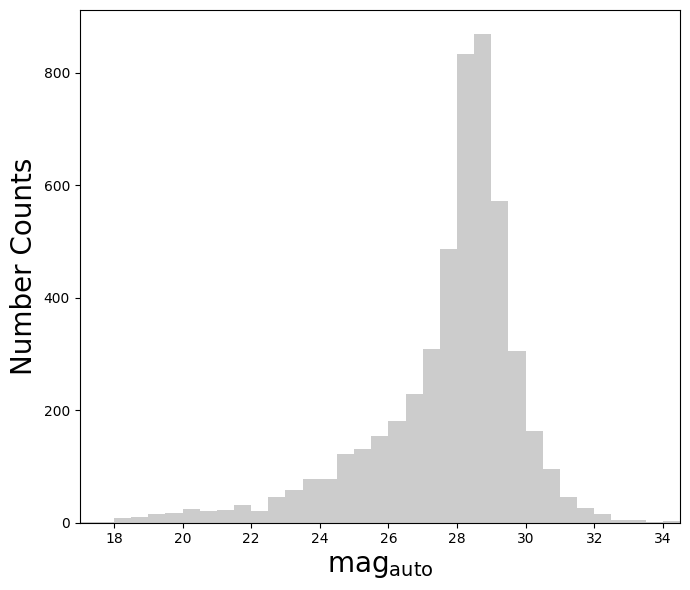

In [15]:
# Plot source counts based on the photometric catalog

fig, ax = plt.subplots(1,1, figsize=(7,6), dpi=100, tight_layout=True)

mag_auto = np.ma.masked_invalid(phot['mag_auto'])
mag_max = np.ceil(np.ma.max(mag_auto))
mag_min = np.floor(np.ma.min(mag_auto))

bin_list = np.arange(mag_min,mag_max,0.5)
xlim = [bin_list[0], bin_list[-1]]

ax.hist(mag_auto[mag_auto.mask==False], bins=bin_list, density=False, color='grey', alpha=0.4)

ax.set_xlabel(r'mag$_{\rm auto}$', fontsize=20)
ax.set_ylabel(r'Number Counts', fontsize=20)
ax.set_xlim(xlim)
